In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [3]:
sys.path.append('../')
from db_config import get_db_engine

In [4]:
# matplotilb 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시 마이너스 깨짐 방지
plt.style.use('ggplot')

In [5]:
# 결과 저장 폴더 생성
RESULT_DIR = '../analsys_results'
os.makedirs(RESULT_DIR, exist_ok=True)

In [6]:
# 데이터 베이스에서 데이터 불러오기
engine = get_db_engine()

In [7]:
# 연령 구간별 다빈도 질환 의료비 데이터 불러오기
query = """
    SELECT * FROM age_based_costs
"""
age_based_costs = pd.read_sql_query(query, engine)

In [ ]:
# 데이터 기본 정보 확인
age_based_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age_cost_id                  3600 non-null   int64  
 1   disease_id                   3600 non-null   int64  
 2   age_group                    3600 non-null   object 
 3   medical_care_cost_total      3600 non-null   float64
 4   insurance_payment            3600 non-null   float64
 5   patient_payment              3600 non-null   float64
 6   patient_payment_per_visit    3600 non-null   float64
 7   patient_payment_per_patient  3600 non-null   float64
 8   patient_count                3600 non-null   int64  
 9   visit_count                  3600 non-null   int64  
 10  rank                         3600 non-null   int64  
 11  year                         3600 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 337.6+ KB


In [10]:
age_based_costs.head()

,age_cost_id,disease_id,age_group,medical_care_cost_total,insurance_payment,patient_payment,patient_payment_per_visit,patient_payment_per_patient,patient_count,visit_count,rank,year
0,1,78,0~4세,136381972.0,112746558.0,23635414.0,19.13,1235569.0,3,7529692,1,2021
1,2,81,0~4세,43402795.0,35530371.0,7872424.0,10.77,731077.0,3,2486451,2,2021
2,3,67,0~4세,28376560.0,23364364.0,5012196.0,10.82,463060.0,3,1620990,3,2021
3,4,3,0~4세,21434406.0,17155397.0,4279009.0,9.37,456585.0,5,897896,4,2021
4,5,66,0~4세,21260453.0,17758542.0,3501911.0,7.39,473951.0,3,1257120,5,2021


In [13]:
# 결측치 확인
missing_value = age_based_costs.isnull().sum()
print('결측치 개수:')
print(missing_value)

결측치 개수:
age_cost_id                    0
disease_id                     0
age_group                      0
medical_care_cost_total        0
insurance_payment              0
patient_payment                0
patient_payment_per_visit      0
patient_payment_per_patient    0
patient_count                  0
visit_count                    0
rank                           0
year                           0
dtype: int64


In [23]:
# 다빈도 1순위 질환 필터링
rank_1_disease = age_based_costs[age_based_costs['rank'] == 1]
print(rank_1_disease['disease_id'])

0       78
100     78
200     78
300     78
400     78
500     78
600     78
700     78
800     78
900     97
1000    97
1100    97
1200    97
1300    97
1400    97
1500    97
1600    97
1701    97
1800    97
1901    97
2000    97
2100    78
2200    78
2301    78
2401    97
2500    97
2600    97
2700    97
2800    97
2900    97
3000    97
3101    97
3201    97
3301    58
3401    58
3501    58
Name: disease_id, dtype: int64


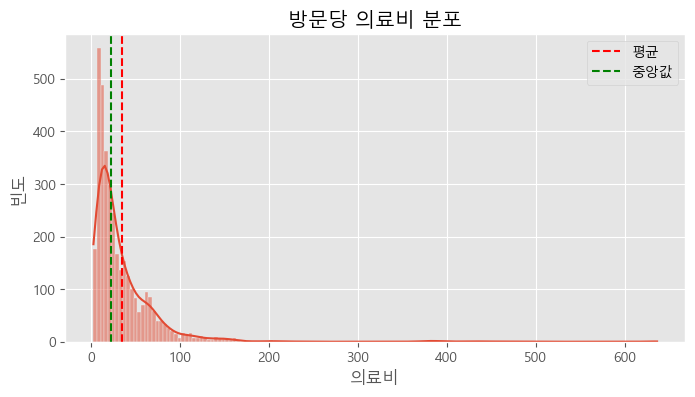

In [19]:
# 데이터 분포 확인
plt.figure(figsize=(8, 4))
sns.histplot(age_based_costs['patient_payment_per_visit'], kde=True)
plt.title('방문당 의료비 분포')
plt.xlabel('의료비')
plt.ylabel('빈도')
plt.axvline(age_based_costs['patient_payment_per_visit'].mean(), color='red', linestyle='--', label='평균')
plt.axvline(age_based_costs['patient_payment_per_visit'].median(), color='green', linestyle='--', label='중앙값')
plt.legend()
plt.show()